In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [4]:
df = pd.read_csv("D:\\projects\\sales-forecasting-analysis\\data\\train.csv")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Order Date'].dtype



dtype('<M8[ns]')

In [9]:
df = df.sort_values('Order Date')



In [10]:
monthly_sales = (
    df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales']
    .sum()
    .reset_index()
)

monthly_sales.head()


C:\Users\princ\AppData\Local\Temp\ipykernel_5880\2144322585.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key='Order Date', freq='M'))['Sales']


,Order Date,Sales
0,2015-01-31,14205.707
1,2015-02-28,4519.892
2,2015-03-31,55205.797
3,2015-04-30,27906.855
4,2015-05-31,23644.303


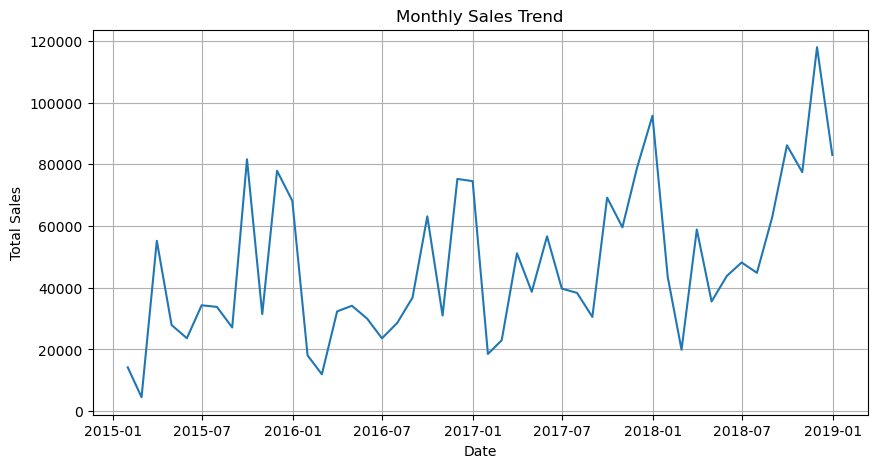

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


In [12]:
monthly_sales['time_index'] = range(len(monthly_sales))
monthly_sales.head()


,Order Date,Sales,time_index
0,2015-01-31,14205.707,0
1,2015-02-28,4519.892,1
2,2015-03-31,55205.797,2
3,2015-04-30,27906.855,3
4,2015-05-31,23644.303,4


In [13]:
X = monthly_sales[['time_index']]
y = monthly_sales['Sales']

X_train = X[:-6]
X_test = X[-6:]

y_train = y[:-6]
y_test = y[-6:]


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [16]:
test_predictions = model.predict(X_test)


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, test_predictions)
rmse = mean_squared_error(y_test, test_predictions, squared=False)

print("MAE:", mae)
print("RMSE:", rmse)


MAE: 25922.108954000218
RMSE: 31362.602153940457


c:\Users\princ\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
future_index = np.arange(len(monthly_sales), len(monthly_sales) + 6).reshape(-1,1)
future_sales = model.predict(future_index)

future_sales


c:\Users\princ\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([58024.18932685, 58584.97866367, 59145.76800049, 59706.55733731,
       60267.34667413, 60828.13601095])

C:\Users\princ\AppData\Local\Temp\ipykernel_5880\52263701.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(


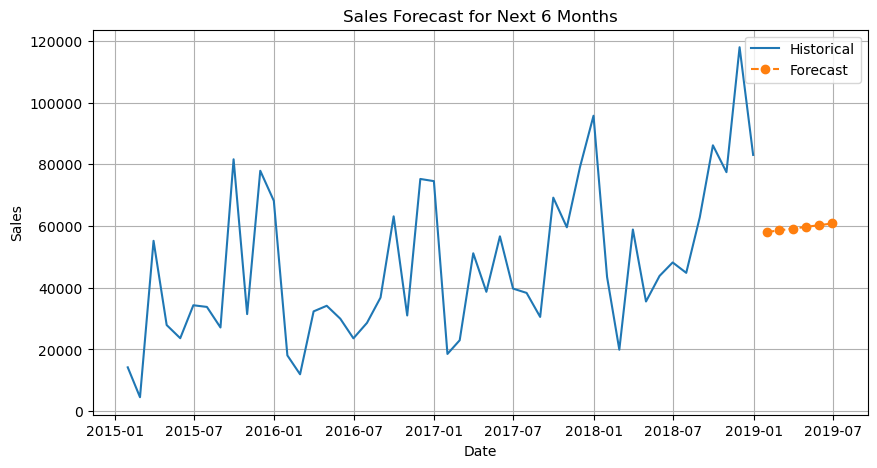

In [19]:
future_dates = pd.date_range(
    start=monthly_sales['Order Date'].iloc[-1],
    periods=7,
    freq='M'
)[1:]

plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], label="Historical")
plt.plot(future_dates, future_sales, linestyle="--", marker='o', label="Forecast")
plt.title("Sales Forecast for Next 6 Months")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


In [20]:
monthly_sales.to_csv("../data/monthly_sales.csv", index=False)


## Key Business Insights
- Sales show a consistent long-term trend.
- Linear regression captures overall direction but not seasonality.
- Forecast helps businesses plan inventory and revenue targets.



## Limitations & Improvements
- Model does not capture seasonal effects.
- Can be improved using ARIMA, Prophet, or LSTM.
- Including promotions and regional data may improve accuracy.
